In [1]:
import pandas as pd

In [2]:
ai_papers = pd.read_csv('./datasets/ai_papers.csv')
dl_papers = pd.read_csv('./datasets/dl_papers.csv')
cv_papers = pd.read_csv('./datasets/cv_papers.csv')

In [3]:
ai_papers = ai_papers.iloc[:50, :]
dl_papers = dl_papers.iloc[:50, :]
cv_papers = cv_papers.iloc[:50, :]

In [4]:
# Adicionando coluna 'label'

ai_papers['label'] = "Artificial Intelligence"
dl_papers['label'] = "Digital Libraries"
cv_papers['label'] = "Computer Vision"


In [5]:
# Concatenando os datasets e exportando

papers = pd.concat([ai_papers, dl_papers, cv_papers])
if 'Unnamed: 0' in papers.columns:
    papers.drop(['Unnamed: 0'], axis=1, inplace=True)

## Primeira análise: distilBert + abstracts

In [6]:
# Alterando colunas para "text" e "label"

abstracts = papers[['abstract', 'label']]
abstracts = abstracts.rename({'abstract':'text'}, axis=1)

In [7]:
# # !pip install spacy
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def remove_stopwords_spacy(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)

# abstracts['text'] = abstracts['text'].apply(remove_stopwords_spacy)

# print(abstracts['text'])


In [7]:
# Pipeline para acelerar transformação para Dataset do HuggingFace

def hf_pipeline(data):
    from datasets import Dataset, ClassLabel

    unique_classes = data['label'].unique()

    dataframe = Dataset.from_pandas(data)
    class_label = ClassLabel(names=list(unique_classes))

    dataframe = dataframe.cast_column('label', class_label)

    return dataframe

In [8]:
abstracts = hf_pipeline(abstracts)

/home/lipecorradini/.cache/pypoetry/virtualenvs/llm-mri-RE74i_Ji-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Casting the dataset: 100%|██████████| 150/150 [00:00<00:00, 50023.50 examples/s]


In [9]:
# Definindo o distilBert como primeiro modelo a ser usado

model_ckpt = 'distilbert-base-uncased'

In [13]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA, SVD

pca = SVD(n_components=40)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

### Obtendo métricas para o distilbert-base-uncased

In [14]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:45<00:00,  3.27 examples/s]


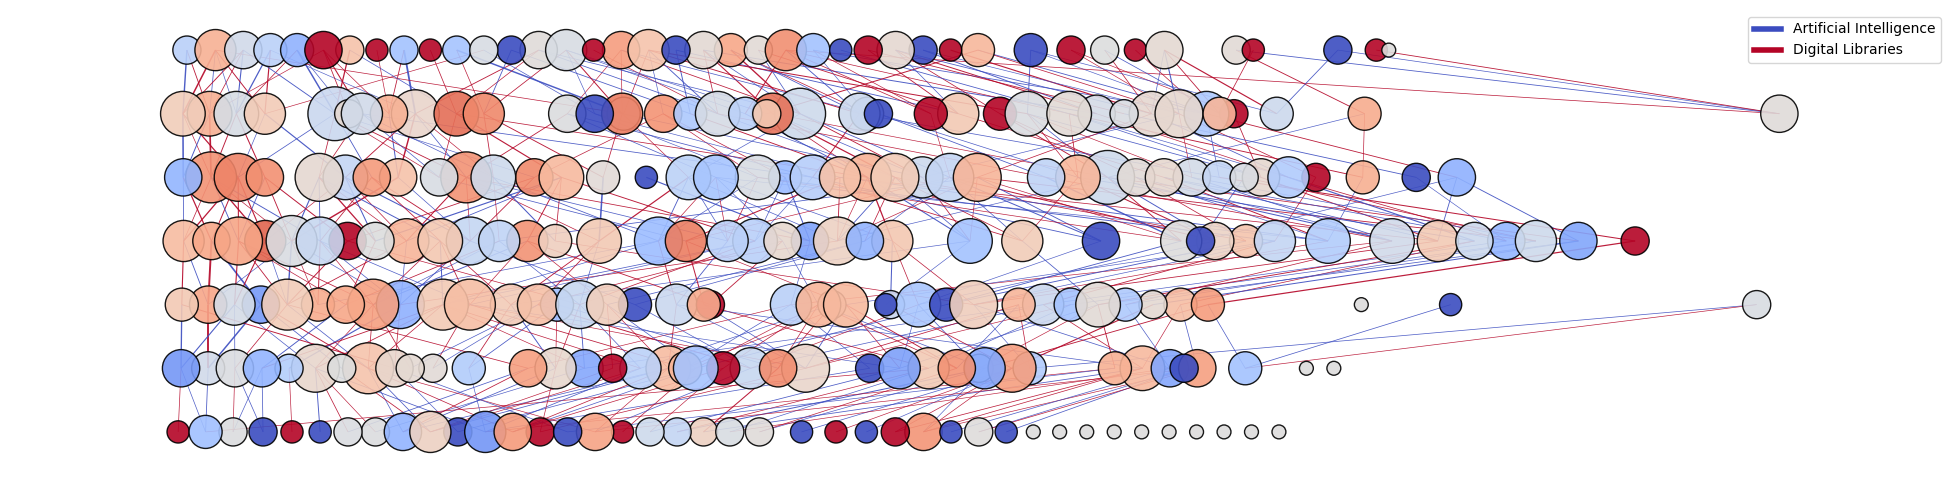

In [17]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.3)
_ = llm_mri.get_graph_image(g, fix_node_dimensions=False)
plt.show()

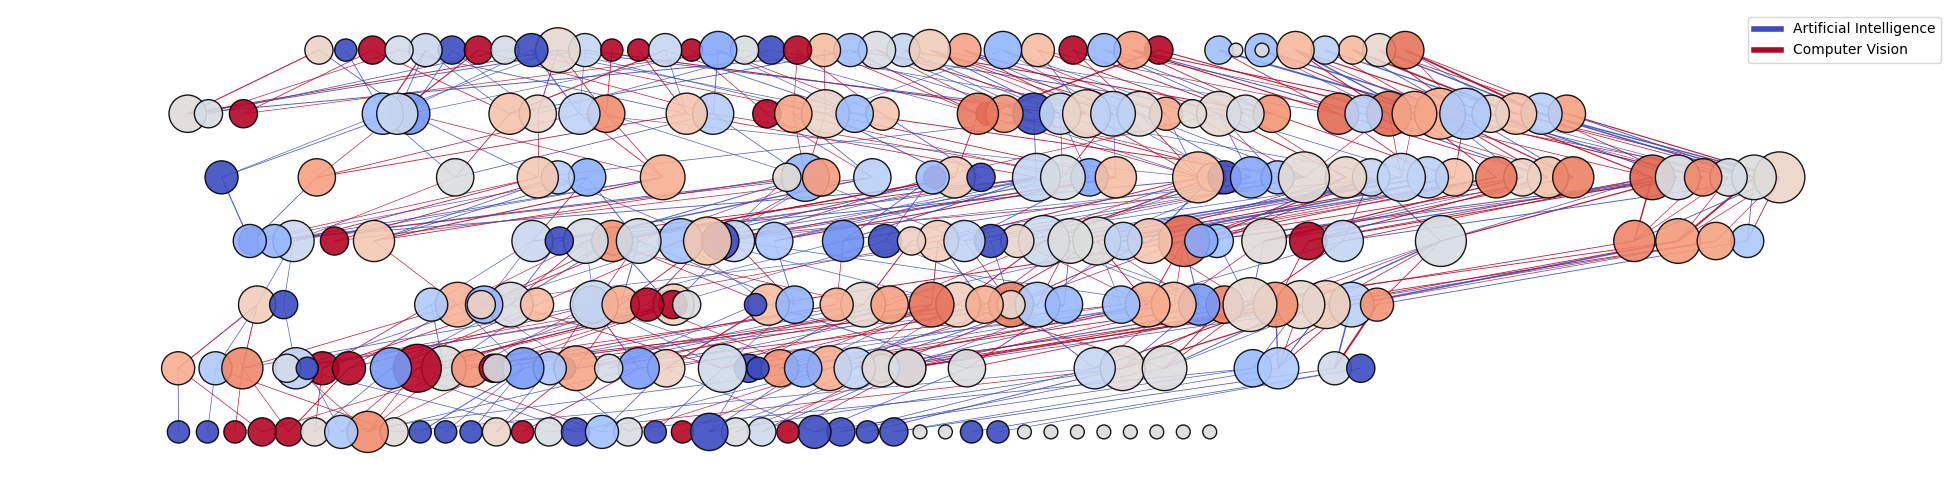

In [18]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.3)
_ = llm_mri.get_graph_image(g, fix_node_dimensions=False)
plt.show()

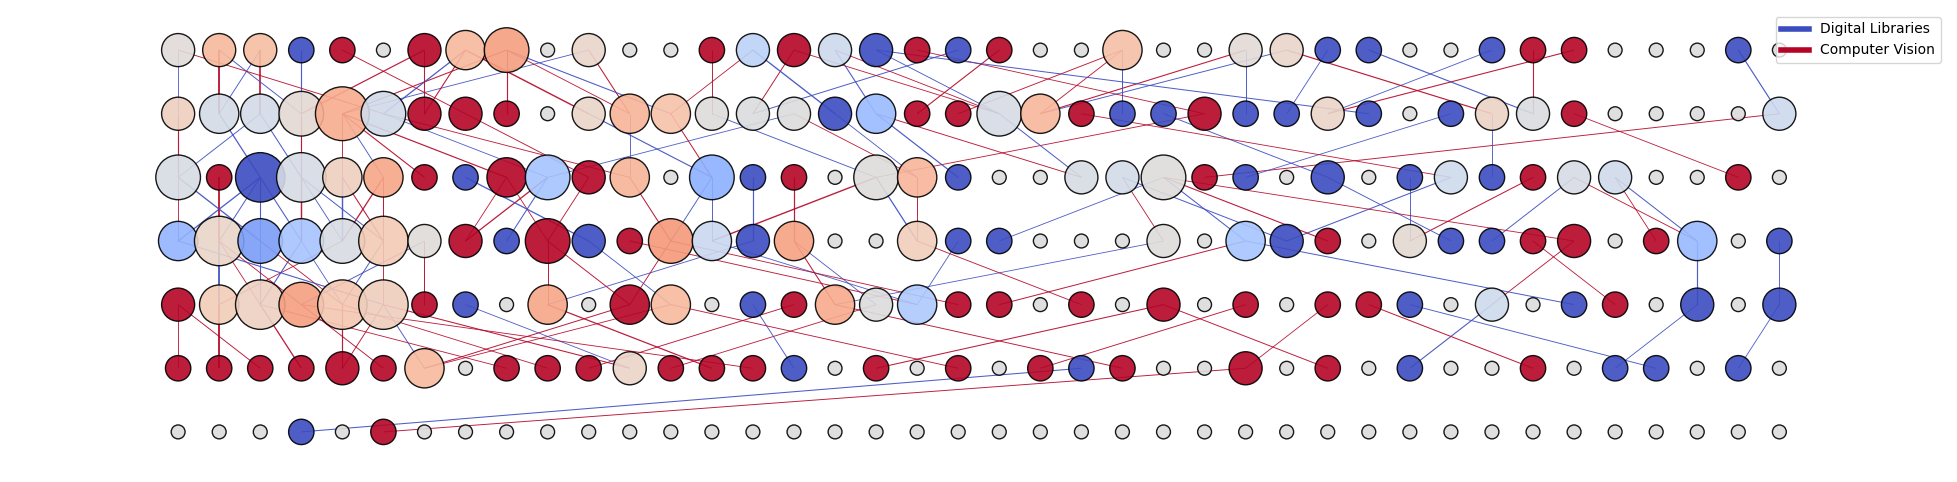

: 

: 

In [ ]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Digital Libraries', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

## Obtendo métricas para o bert-base-uncased

In [39]:
model_ckpt = 'bert-base-uncased'
# model_ckpt = 'FacebookAI/roberta-base'

In [40]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA

pca = PCA(n_components=20)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

In [41]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:56<00:00,  2.63 examples/s]


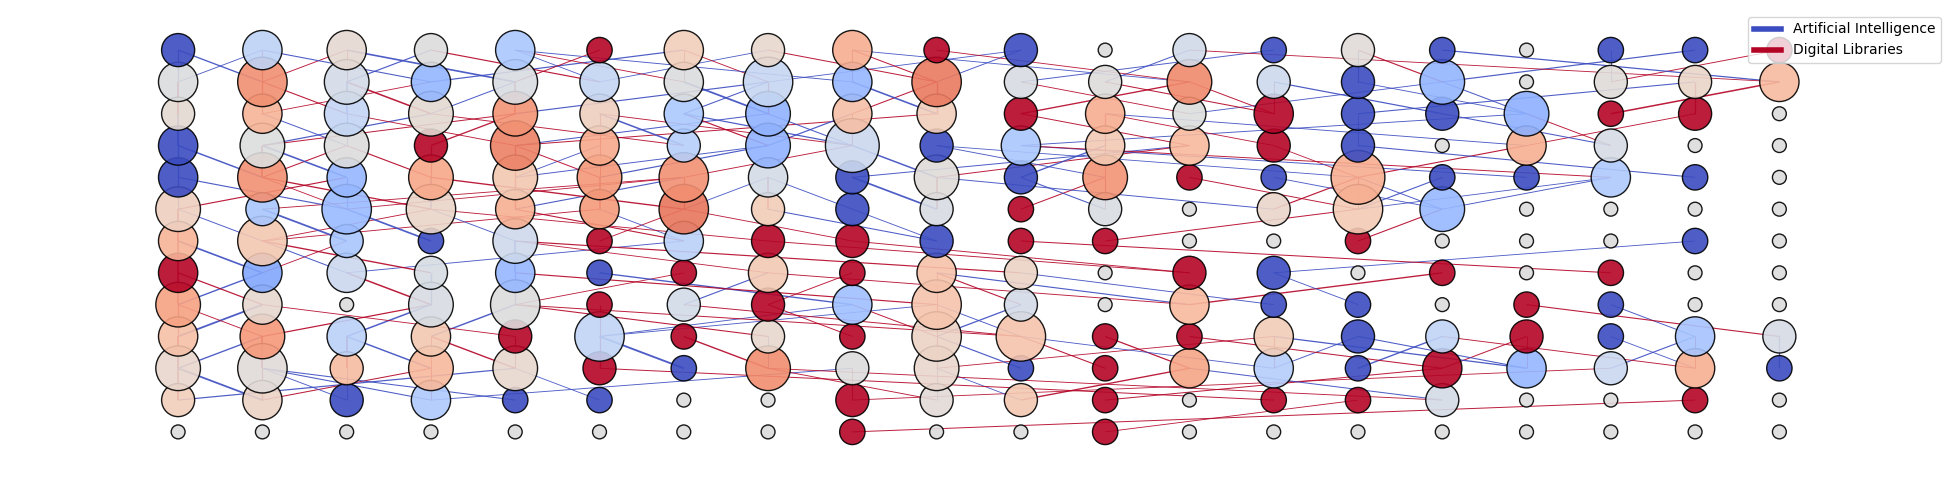

In [50]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_dl = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g_ai_dl)
plt.show()

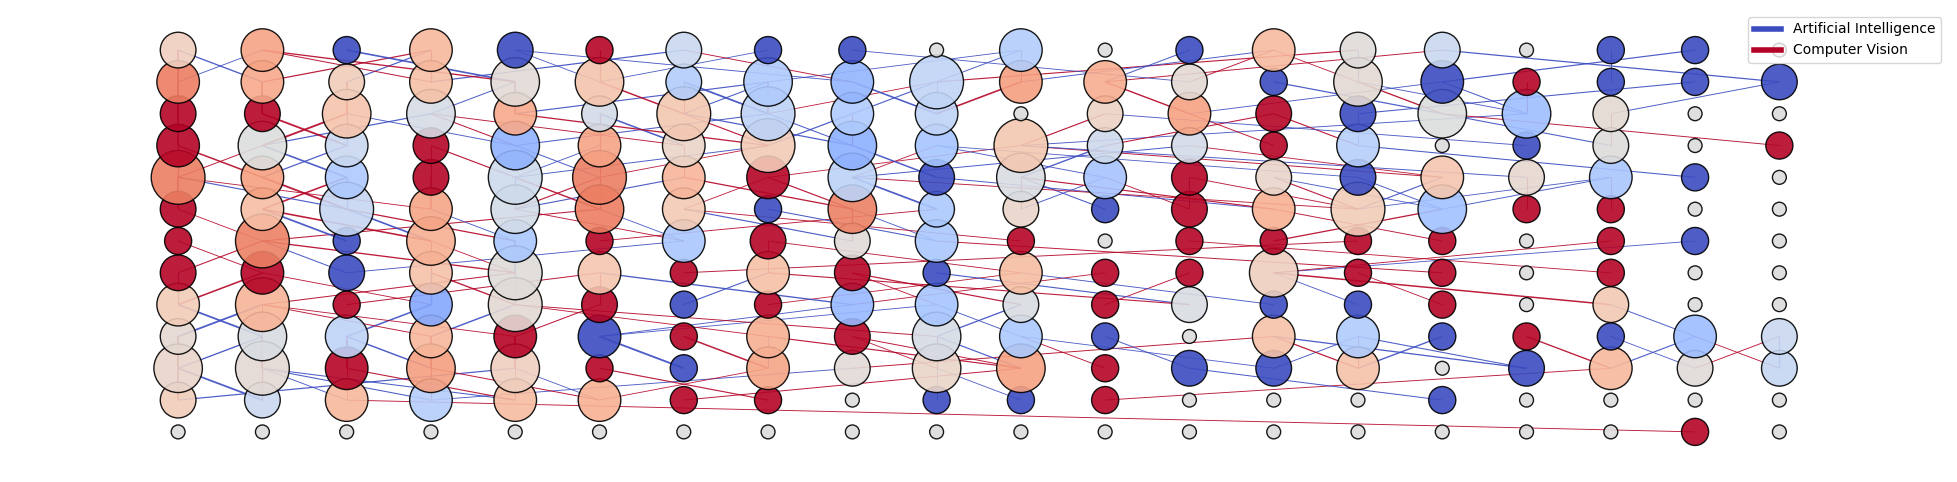

In [51]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_cv = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g_ai_cv)
plt.show()

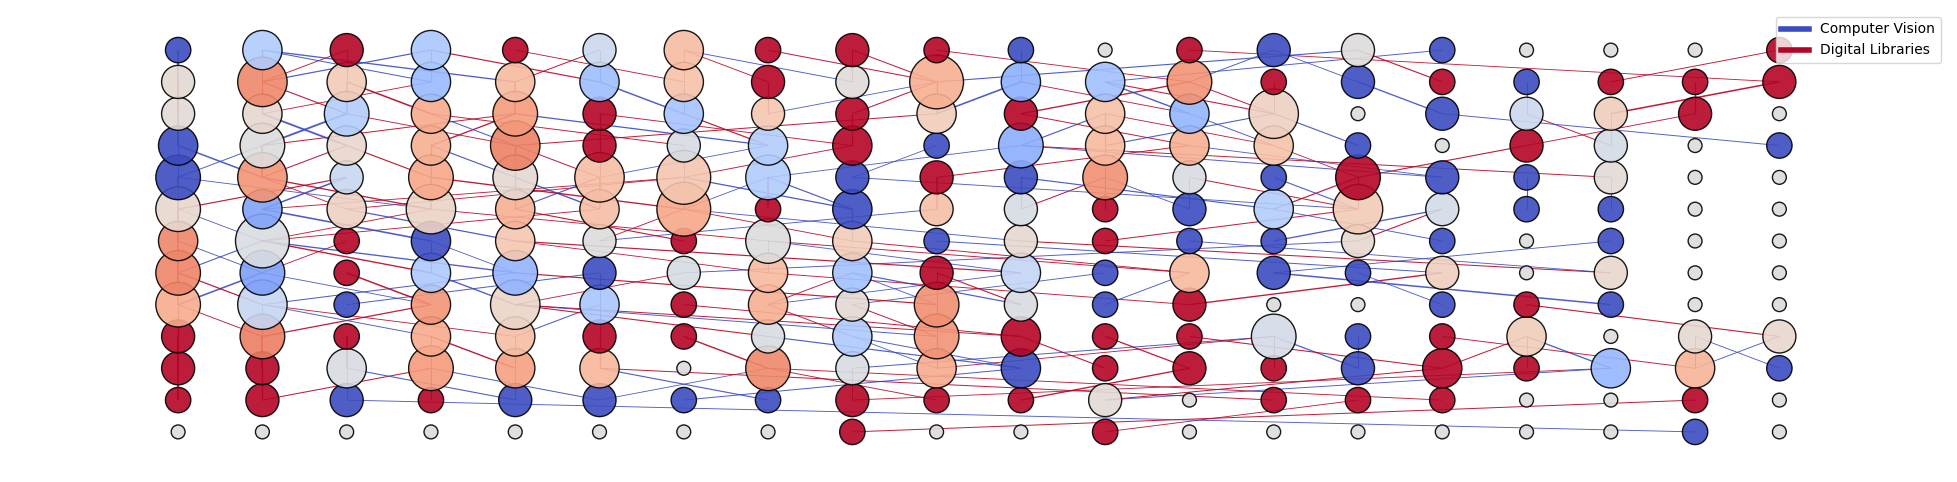

In [46]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Computer Vision', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

### Getting individual graphs mor metrics analysis

In [47]:
g_ai = llm_mri.get_graph(['Artificial Intelligence'], threshold=0.4)
g_dl = llm_mri.get_graph(['Digital Libraries'], threshold=0.4)
g_cv = llm_mri.get_graph(['Computer Vision'], threshold=0.4)

In [ ]:
from llm_mri import Metrics

metrics_ai = Metrics(g_ai, model_name=model_ckpt, label="Artificial Intelligence")
print("Artificial Intelligence metrics: ", metrics_ai.get_basic_metrics())

metrics_dl = Metrics(g_dl, model_name=model_ckpt, label="Digital Libraries")
print("Digital Libraries metrics: ", metrics_dl.get_basic_metrics())

metrics_cv = Metrics(g_cv, model_name=model_ckpt, label="Computer Vision")
print("Computer Vision metrics: ", metrics_cv.get_basic_metrics())

Artificial Intelligence metrics:  {'mean_degree': 1.0846153846153845, 'var_degree': 0.9426195426195426, 'skew_degree': 0.4671150922147216, 'kurt_degree': -0.7122275996165719, 'mean_strength': 0.6087996579133548, 'var_strength': 0.33265025905301826, 'skew_strength': 0.7455975194401439, 'kurt_strength': -0.07593133060876944, 'assortativity': 0.34370450370884736, 'density': 0.004187704187704188, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence'}
Deep Learning metrics:  {'mean_degree': 1.1076923076923078, 'var_degree': 1.108048708048708, 'skew_degree': 0.7437672026153768, 'kurt_degree': -0.08070426050717616, 'mean_strength': 0.5905490380067092, 'var_strength': 0.3303550785947214, 'skew_strength': 0.7930588878137955, 'kurt_strength': -0.07301133790240932, 'assortativity': 0.1099436632299837, 'density': 0.004276804276804277, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Di

Evaluating metrics from similar (AI and CV) and distinct (AI and DL) categories:

In [52]:
metrics_distinct = Metrics(g_ai_dl, model_name=model_ckpt, label="Artificial Intelligence and Digital Libraries")
print("Artificial Intelligence and Digital Libraries metrics: ", metrics_distinct.get_basic_metrics())

metrics_similar = Metrics(g_ai_cv, model_name=model_ckpt, label="Artificial Intelligence and Computer Vision")
print("Artificial Intelligence and Computer Vision metrics: ", metrics_similar.get_basic_metrics())

Artificial Intelligence and Digital Libraries metrics:  {'mean_degree': 2.0538461538461537, 'var_degree': 2.352301752301752, 'skew_degree': 0.3165815832609407, 'kurt_degree': -0.7411655053492399, 'mean_strength': 1.1108670317209683, 'var_strength': 0.7555041259708702, 'skew_strength': 0.41338636979106264, 'kurt_strength': -0.802193959421655, 'assortativity': 0.22082745416385394, 'density': 0.00792990792990793, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence and Digital Libraries'}
Artificial Intelligence and Computer Vision metrics:  {'mean_degree': 2.0, 'var_degree': 2.1544401544401546, 'skew_degree': 0.26577001247682924, 'kurt_degree': -0.8642009201099485, 'mean_strength': 1.1013662496438392, 'var_strength': 0.7442398400214126, 'skew_strength': 0.4469990144144769, 'kurt_strength': -0.6860932208172401, 'assortativity': 0.3230250182571983, 'density': 0.007722007722007722, 'center_of_mass': -0.5, 'center_of_strength